In [27]:
import numpy as np
import matplotlib.pyplot as plt

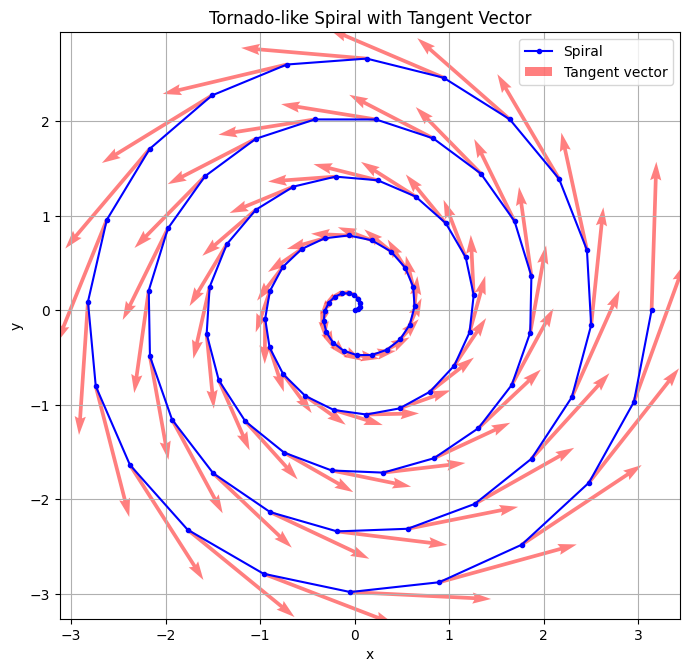

In [40]:
# Parameters
from typing import Callable


a = 0  # Initial radius
b = 0.1  # Controls the distance between successive turns


g_t: tuple[Callable[[float], float], Callable[[float], float]] = (
    lambda t: (a + b * t) * np.cos(t),  # x(t)
    lambda t: (a + b * t) * np.sin(t),  # y(t)
)


# Numerical differentiation
def D(f, t, h=1e-5) -> float:
    return (f(t + h) - f(t - h)) / (2 * h)


def D_t(
    g_t: tuple[Callable[[float], float], Callable[[float], float]], t: float, h=1e-5
):
    (x_t, y_t) = g_t
    dx_dt = D(x_t, t, h)
    dy_dt = D(y_t, t, h)
    alpha = np.arctan(dy_dt / dx_dt)
    return (dx_dt, dy_dt, alpha)


def generate_stamp(
    g_t: tuple[Callable[[float], float], Callable[[float], float]],
    t_range: tuple[float, float],
    t_step: int = 100,
    h=1e-5,
) -> list[np.ndarray[np.float64]]:
    t = np.linspace(t_range[0], t_range[1], t_step)
    stamp_vector: list[np.ndarray[np.float64]] = []

    (x_t, y_t) = g_t
    for dt in t:
        x = x_t(dt)
        y = y_t(dt)
        (dx_dt, dy_dt, alpha) = D_t(g_t, dt, h)
        vec = np.array([x, y, dx_dt, dy_dt, alpha])
        stamp_vector.append(vec)

    return stamp_vector


tangential_vector = generate_stamp(g_t, (0, 10 * np.pi), 100)

plt.figure(figsize=(8, 8))
plt.axis("equal")
plt.plot(
    [tangent[0] for tangent in tangential_vector],
    [tangent[1] for tangent in tangential_vector],
    label="Spiral",
    color="b",
    marker=".",
)
plt.quiver(
    [tangent[0] for tangent in tangential_vector],
    [tangent[1] for tangent in tangential_vector],
    [tangent[2] for tangent in tangential_vector],
    [tangent[3] for tangent in tangential_vector],
    angles="xy",
    scale_units="xy",
    scale=2,
    color="r",
    alpha=0.5,
    label="Tangent vector",
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Tornado-like Spiral with Tangent Vector")
plt.gca().set_aspect("equal", adjustable="box")
plt.legend()
plt.grid(True)
plt.show()